# Product Demand Forecast

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as plt

## Explore data

### Read input data

In [241]:
orig_demand_df = pd.read_csv('Historical Product Demand.csv')
print('Original: ' + str(orig_demand_df.shape))
orig_demand_df.head(4)

Original: (1048575, 5)


,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500


### Data preprocessing

Let's check for NAs first

In [282]:
orig_demand_df.isna().sum()

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64

As we can see, only date column has NAs. Since we literally have no way to figure out the missing date, we need to drop all of them.

In [ ]:
# remove NA
demand_df = orig_demand_df.copy()
demand_df.dropna(inplace=True)
print('After: ' + str(demand_df.shape))

In [275]:
# convert demand to int
demand_df.Order_Demand = orig_demand_df.Order_Demand.str.replace('\(|\)', '').astype(int)
# convert to datetime
demand_df.Date = pd.to_datetime(demand_df.Date)
# Remove redundant prefixes
demand_df['Product_Code'] = [cat.split('_')[1] for cat in demand_df['Product_Code']]
demand_df['Product_Category'] = [cat.split('_')[1] for cat in demand_df['Product_Category']]

After: (1037336, 5)


A little summary for our data

In [276]:
print('Date range: ({}, {})'.format(demand_df.Date.min(), demand_df.Date.max()))
demand_df.drop('Date', axis=1).describe(include='all').iloc[:4,:]

Date range: (2011-01-08 00:00:00, 2017-01-09 00:00:00)


,Product_Code,Warehouse,Product_Category,Order_Demand
count,1037336,1037336,1037336,1037336.0
unique,2160,4,33,NaN
top,1359,Whse_J,019,NaN
freq,16936,764447,470266,NaN


### Generic plots

In [170]:
sns.set(rc={'figure.figsize':(15, 8)})

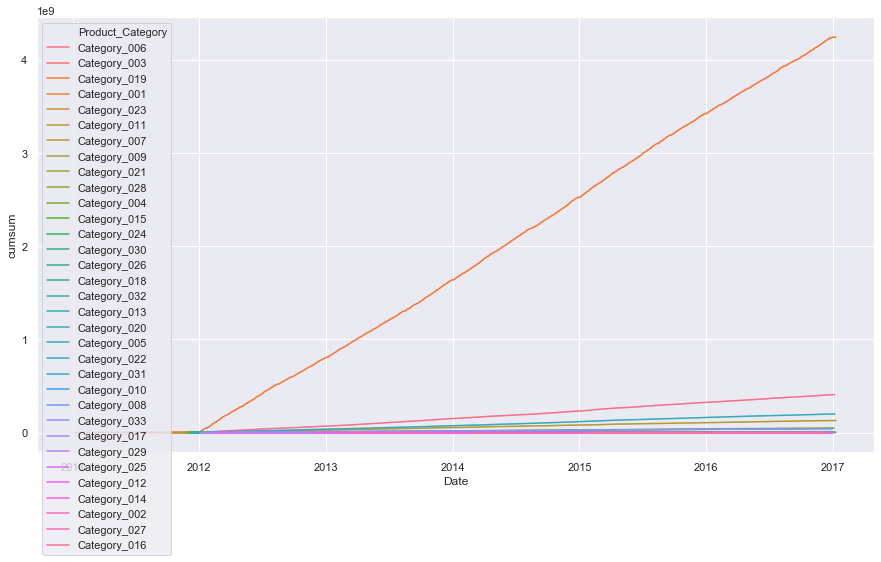

In [169]:
# sns.lineplot(data=demand_df, x='Date', y='Order_Demand', hue='Product_Category')

cumsum_demand_df = demand_df.sort_values('Date')
cumsum_demand_df['cumsum'] = cumsum_demand_df.groupby('Product_Category').cumsum()

sns.lineplot(data=cumsum_demand_df, x='Date', y='cumsum', hue='Product_Category')

del cumsum_demand_df

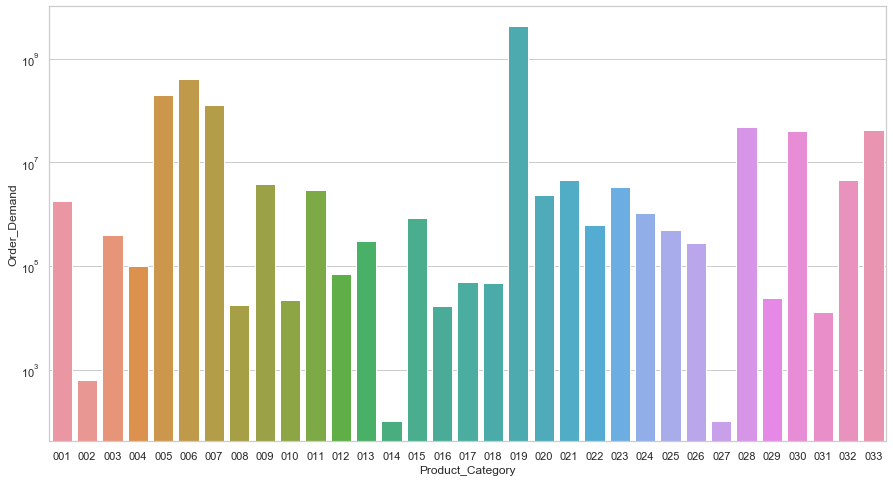

In [295]:
demand_by_cat_df = demand_df.groupby('Product_Category').sum().reset_index()
sns.set_style("whitegrid")
g = sns.barplot(data=demand_by_cat_df, y='Order_Demand', x='Product_Category')
g.set_yscale("log")
del demand_by_cat_df, g

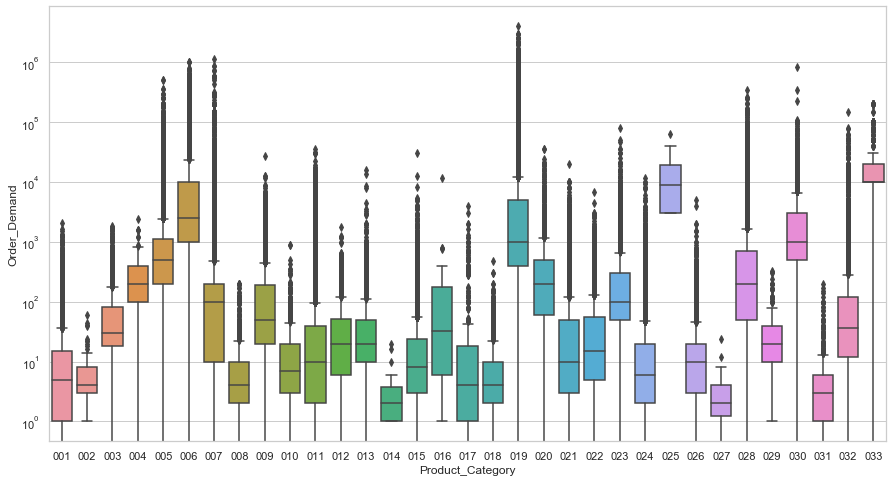

In [296]:
g = sns.boxplot(data=demand_df, y='Order_Demand', x='Product_Category', showfliers=True)
g.set_yscale("log")
del g

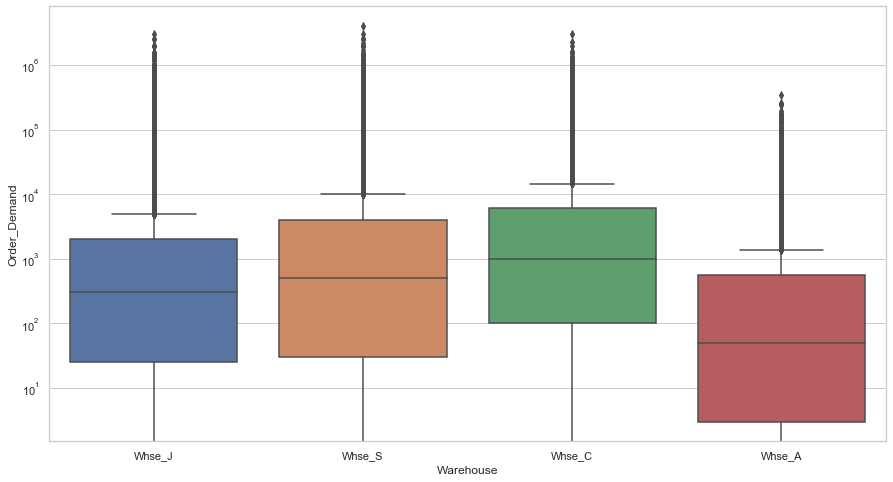

In [297]:
g = sns.boxplot(data=demand_df, y='Order_Demand', x='Warehouse', showfliers=True)
g.set_yscale("log")
del g